In [1]:
%reset -f

%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from functions import *

# Load each
datasets = {}
for hour in range(24):
    df = pd.read_csv(f"Splits/dataset_hour_{hour}.csv")

    datasets[hour] = deseasonalize(df, "both")

regex_choice = "^(sun_|wind_|temp_)"
pca_percent = 0.7

y_train, y_test, y_train_deseason, y_test_deseason, y_train_season, y_test_season, \
exog_variables_train, scalers, exog_variables_train_stand, exog_variables_test, \
exog_variables_test_stand, pca_train, pca_test = split_data_into_series(datasets, pca_percent, regex_choice)

In [ ]:
pca_train[0].shape

(3286, 7)

Hour 0 done
Hour 1 done
Hour 2 done
Hour 3 done
Hour 4 done
Hour 5 done
Hour 6 done
Hour 7 done
Hour 8 done
Hour 9 done
Hour 10 done
Hour 11 done
Hour 12 done
Hour 13 done
Hour 14 done
Hour 15 done
Hour 16 done
Hour 17 done
Hour 18 done
Hour 19 done
Hour 20 done
Hour 21 done
Hour 22 done
Hour 23 done
SMAPE baseline (24 lags) out of sample prediction: [[298.90944381]
 [ 52.64479243]
 [ 71.28906454]]


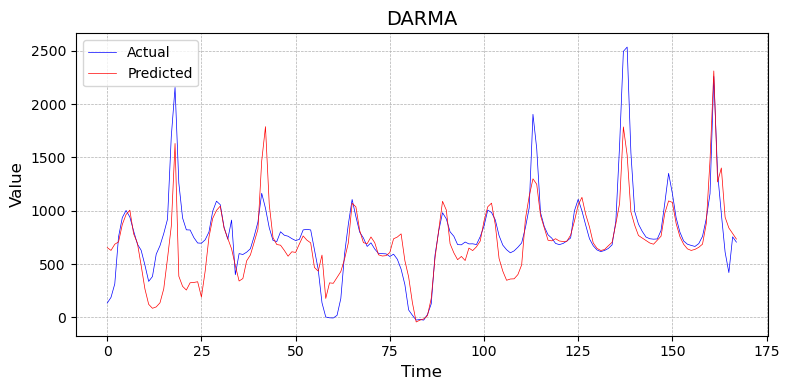

In [36]:
predictions_dict = {}

for hour in range(24):
    darma_mle_est = MLE_DARMA(y_train_deseason[hour])

    darma_forecast = DARMA_forecast_array(darma_mle_est, y_test_deseason[hour].flatten())

    predictions_dict[hour] = darma_forecast.reshape(-1,1) + y_test_season[hour]

    print(f"Hour {hour} done")


combined_predictions, combined_test = combine_24_hour_data(predictions_dict, y_test)

rmse, smape, rmae = out_of_sample_pred(combined_test, combined_predictions)


model_1 = np.array([[rmse], [smape], [rmae]])
combined_predictions_model_1 = combined_predictions

print(f'SMAPE baseline (24 lags) out of sample prediction: {model_1}')

plot_actual_vs_predicted(combined_test, combined_predictions_model_1, "DARMA")

In [ ]:
predictions_dict = {}

for hour in range(24):
    darma_mle_est = MLE_DARMAX(y_train_deseason[hour], )

    darma_forecast = DARMA_forecast_array(darma_mle_est, y_test_deseason[hour].flatten())

    predictions_dict[hour] = darma_forecast.reshape(-1,1) + y_test_season[hour]

    print(f"Hour {hour} done")


combined_predictions, combined_test = combine_24_hour_data(predictions_dict, y_test)

rmse, smape, rmae = out_of_sample_pred(combined_test, combined_predictions)


model_1 = np.array([[rmse], [smape], [rmae]])
combined_predictions_model_1 = combined_predictions

print(f'SMAPE baseline (24 lags) out of sample prediction: {model_1}')

plot_actual_vs_predicted(combined_test, combined_predictions_model_1, "Seasonal SARIMA predictions")